In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Loading and displaying the dataset
df = pd.read_csv('CancerClassification.csv')
print(df)

     Cl.thickness  Cell.size  Cell.shape  Marg.adhesion  Epith.c.size  \
0       45.112062  51.798322   47.877500      53.385136     58.408301   
1       70.864529  57.307064   63.333871      62.865781     55.409522   
2       49.307810  71.424268   42.062140      40.255089     35.533395   
3       66.775425  60.810981   64.712988      79.132088     67.626699   
4       52.012773  62.644698   67.966587      43.309239     51.623986   
..            ...        ...         ...            ...           ...   
678     45.895448  58.859543   63.878934      59.358741     50.247380   
679     68.697373  37.409173   49.989872      49.115574     55.864530   
680     51.550280  69.778100   54.258628      55.536820     57.292757   
681     63.460881  49.141312   38.042230      61.115623     33.504183   
682     51.766514  41.607881   64.059539      62.313476     44.386715   

     Bare.nuclei  Bl.cromatin  Normal.nucleoli    Mitoses  Class  
0      39.929594    46.499295        50.669261  53.07839

In [ ]:
# Exploring the data
df.columns

Index(['Cl.thickness', 'Cell.size', 'Cell.shape', 'Marg.adhesion',
       'Epith.c.size', 'Bare.nuclei', 'Bl.cromatin', 'Normal.nucleoli',
       'Mitoses', 'Class'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cl.thickness     683 non-null    float64
 1   Cell.size        683 non-null    float64
 2   Cell.shape       683 non-null    float64
 3   Marg.adhesion    683 non-null    float64
 4   Epith.c.size     683 non-null    float64
 5   Bare.nuclei      683 non-null    float64
 6   Bl.cromatin      683 non-null    float64
 7   Normal.nucleoli  683 non-null    float64
 8   Mitoses          683 non-null    float64
 9   Class            683 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 53.5 KB


In [ ]:
df.describe()

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,53.794592,54.493624,54.902298,53.704678,53.722228,54.141138,53.836756,54.427693,53.636725,0.349927
std,10.332521,10.368235,10.160878,10.669766,10.474714,10.146594,9.756423,10.102067,9.927914,0.477296
min,11.641612,23.947718,24.821445,20.475761,23.598114,19.397066,21.727114,23.159512,24.521231,0.000000
25%,46.575414,47.319452,47.773908,45.897371,46.664622,47.945944,47.385312,47.882020,46.578237,0.000000
50%,54.239844,54.508344,55.160264,53.432298,53.815078,53.823819,54.120836,54.539211,54.060280,0.000000
75%,60.300560,61.436500,62.065397,60.865782,60.741584,61.112674,60.397951,60.919610,60.357356,1.000000
max,89.699515,93.321471,87.376942,85.833716,89.550155,85.626194,79.255614,85.948280,86.227466,1.000000


In [ ]:
df.isnull().sum()

,0
Cl.thickness,0
Cell.size,0
Cell.shape,0
Marg.adhesion,0
Epith.c.size,0
Bare.nuclei,0
Bl.cromatin,0
Normal.nucleoli,0
Mitoses,0
Class,0


In [ ]:
# Exploring our target
df['Class'].value_counts()

,count
Class,
0,444
1,239


<Axes: xlabel='Class', ylabel='count'>

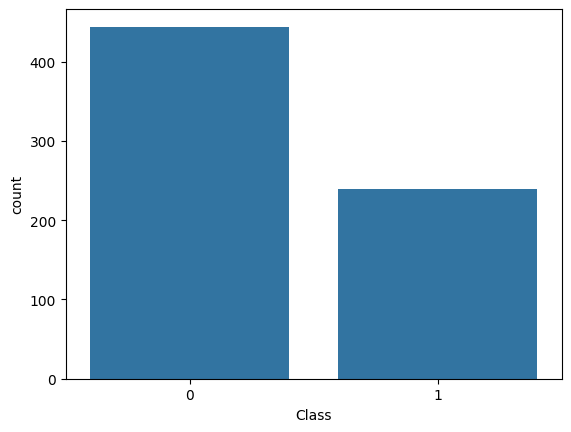

In [ ]:
# Visualizing our target using sns plot
sns.countplot(x='Class', data=df)

Task 2.1

In [ ]:
# Seperating the data into features and target (X and y)
X = df.drop('Class', axis = 1)
y = df['Class']

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Selecting and fitting the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
#  First 10 predictions
print(y_pred[:10])

# Actual values
print(y_test.values[:10])

[0 1 0 0 1 0 0 0 0 0]
[0 1 0 0 0 0 1 0 1 0]


Task 2.2

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[83  7]
 [25 22]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84        91
           1       0.72      0.50      0.59        46

    accuracy                           0.77       137
   macro avg       0.75      0.70      0.71       137
weighted avg       0.76      0.77      0.75       137



In [ ]:
score = accuracy_score(y_test, y_pred)
print(score)

0.7664233576642335


Confusion Matrix is a method which helps us in summarising the performance metrics of our model. We understand the specificity, sensitivity and accuracy of our model with the help of confusion matrix. We have a 2x2 matrix with each cell representing the comparison between the prediction and actual values.

In cell 1x1, which is True Negative (TN) - we have the model predicting 0 while the actual value is 0. The model was successful 82 times.

In cell 1x2: False Positive (FP) - the model predicts 0 as 1; 9 times.

In cell 2x1: False Negative (FN) - the model predicts 1 as 0; 23 times.

In cell 2x2: True Positive (TP) - the model predicts 1 as 1; 23 times.

Classification report gives us precision, recall and f1-score of our model in a tabular format.

Precision gives us the amount of correct predictions and the formula is: Precision = TP/(TP+FP)

Recall gives us the proportion of positive predictions our model was able to identify and it is given by:
Recall = TP/(TP+FN)

F1-score gives us a balance between Precision and Recall and it's formula is:
F1-score = 2 * Precision * Recall / (Recall + Precision)

Accuracy Score gives us a percentage of the number of accurate predictions done by our model divided by the total number of predictions.
Accuracy score = No. of correct predictions / Total predictions

Task 2.3

The overall accuracy of our model is 76.6%, a decent score but considering the context of our project this cannot be the only defining metric. Addressing the output of our classification report reveals several insights regarding the performance of our model. Precision for Class 0 was 0.78 and for Class 1 was 0.72; this is good since whenever the model predicts cancer it is correct 72% of the time. Recall for our model in Class 0 is 0.90 and Class 1 is 0.50; this is concerning since our model is far better at identifying cases where cancer cells are benign than cases where cancer cells are malignant. Recall should be higher for predicting Class 1 cases, since it is very important to not miss an actual cancer diagnosis but our model is only able to correctly identify 50% of actual malignant cases. F1-score for Class 0 of this model is 0.84; which is good but the model should perform better at predicting Class 1 which has an F1-score of only 0.59. Support shows our test data has 91 cases of Class 0 which is almost double when compared to 46 cases of Class 1.

The most important metric in our context of breast cancer classification is Recall for Class 1 which refers to malignant cases, since it is essential to identify patients who truly have cancer. Here, false negatives can lead to fatal consequences. Since we have a greater number of Class 0, accuracy will be ineffective as the model can just predict "Benign" most of the time and have a similar performance. This is called class imbalance and it affects the performance of our model. Precision for Class 1 is also good, indicating that when the model identifies a case malignant, it is correct most of the time. However, it is less critical than recall in our context.

Task 2.4

<Axes: >

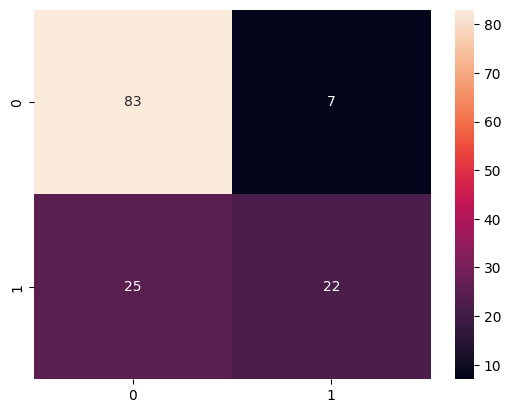

In [ ]:
# confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

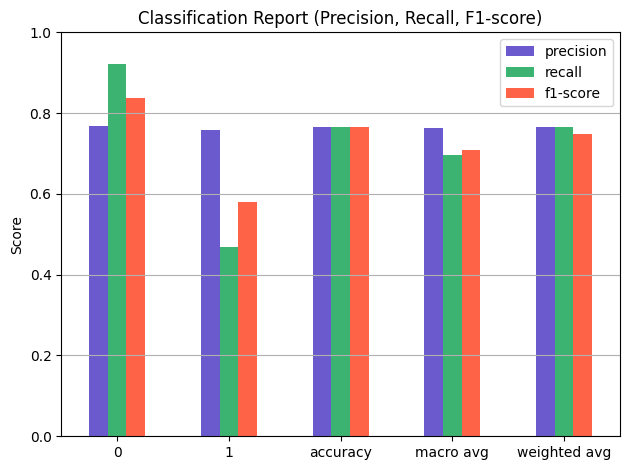

In [ ]:
# classification report barplot
cr = classification_report(y_test, y_pred, output_dict=True)
df_cr = pd.DataFrame(cr).transpose()[['precision', 'recall', 'f1-score']]
df_cr.plot(kind='bar', color = ['slateblue', 'mediumseagreen', 'tomato'])
plt.title('Classification Report (Precision, Recall, F1-score)')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation = 0)
plt.tight_layout()
plt.grid(axis = 'y')
plt.show()

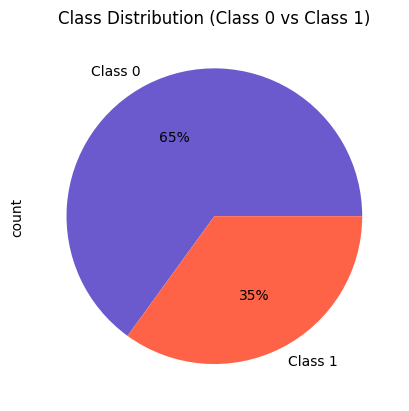

In [ ]:
# Class imbalance
df['Class'].value_counts().plot(kind='pie', autopct='%1.0f%%', labels = ['Class 0', 'Class 1'], colors = ['slateblue', 'tomato'])
plt.title('Class Distribution (Class 0 vs Class 1)')
plt.show()